In [1]:
# Warning ! You need to install geopandas on anaconda first
import os
import pandas as pd
import numpy as np
import json
import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [2]:
fname = "./BikePaths/reseau_cyclable_2018_c.geojson"

bp = gpd.read_file(fname)

print(type(bp))

bp

<class 'geopandas.geodataframe.GeoDataFrame'>


ID  ID_TRC_GEO  TYPE_VOIE  TYPE_VOIE2  LONGUEUR  NBR_VOIE  \
0     8998.0   1230109.0        4.0         0.0      90.0       2.0   
1        2.0         0.0        5.0         0.0      20.0       2.0   
2        3.0   1623974.0        1.0         0.0      36.0       2.0   
3        4.0   1010521.0        3.0        31.0      46.0       1.0   
4        5.0         0.0        5.0         0.0      42.0       2.0   
...      ...         ...        ...         ...       ...       ...   
6390  9048.0         0.0        4.0         0.0      37.0       2.0   
6391  9055.0   4012362.0        4.0         0.0     142.0       2.0   
6392  9056.0   4012356.0        4.0         0.0     745.0       2.0   
6393  9057.0      9999.0        1.0         0.0       8.0       2.0   
6394  9058.0   4012364.0        1.0         0.0      10.0       2.0   

     SEPARATEUR SAISONS4 PROTEGE_4S Ville_MTL  \
0             M      OUI        OUI       OUI   
1          None      NON        NON       OUI   
2          None      NON        NON       OUI   
3          None      NON        NON       OUI   
4          None      NON        NON       OUI   
...         ...      ...        ...       ...   
6390          M     None       None       OUI   
6391          M      NON        NON       OUI   
6392          M      NON        NON       OUI   
6393          M      NON        NON       OUI   
6394          M      NON        NON       OUI   

                                    NOM_ARR_VI  \
0                        Le Plateau-Mont-Royal   
1     Rivi�re-des-Prairies�Pointe-aux-Trembles   
2     Rivi�re-des-Prairies�Pointe-aux-Trembles   
3                        Ahuntsic-Cartierville   
4                                 Le Sud-Ouest   
...                                        ...   
6390                                    Verdun   
6391  Rivi�re-des-Prairies�Pointe-aux-Trembles   
6392  Rivi�re-des-Prairies�Pointe-aux-Trembles   
6393  Rivi�re-des-Prairies�Pointe-aux-Trembles   
6394  Rivi�re-des-Prairies�Pointe-aux-Trembles   

                                               geometry  
0     (LINESTRING Z (-73.59024203982732 45.532589280...  
1     (LINESTRING Z (-73.49679478102101 45.695741649...  
2     (LINESTRING Z (-73.57344998170396 45.658526272...  
3     (LINESTRING Z (-73.71793473411516 45.535498916...  
4     (LINESTRING Z (-73.55178529735286 45.490851250...  
...                                                 ...  
6390  (LINESTRING Z (-73.58081478479296 45.465652788...  
6391  (LINESTRING Z (-73.54196326966586 45.659322867...  
6392  (LINESTRING Z (-73.54331042277438 45.658472763...  
6393  (LINESTRING Z (-73.54022970362077 45.660267491...  
6394  (LINESTRING Z (-73.54030765675135 45.660338646...  

[6395 rows x 12 columns]

In [156]:
print(bp.Ville_MTL.unique())

['OUI' 'NON']


In [157]:
bp = bp[bp['Ville_MTL']=='OUI']

In [158]:
print(bp.Ville_MTL.unique())

['OUI']


In [159]:
bp[0:23]

ID  ID_TRC_GEO  TYPE_VOIE  TYPE_VOIE2  LONGUEUR  NBR_VOIE SEPARATEUR  \
0   8998.0   1230109.0        4.0         0.0      90.0       2.0          M   
1      2.0         0.0        5.0         0.0      20.0       2.0       None   
2      3.0   1623974.0        1.0         0.0      36.0       2.0       None   
3      4.0   1010521.0        3.0        31.0      46.0       1.0       None   
4      5.0         0.0        5.0         0.0      42.0       2.0       None   
5   8166.0         0.0        5.0         0.0      98.0       2.0       None   
6      7.0         0.0        5.0         0.0      47.0       2.0          M   
8      9.0         0.0        5.0         0.0      75.0       2.0       None   
9     10.0         0.0        5.0         0.0     227.0       2.0       None   
10    11.0         0.0        5.0         0.0      67.0       2.0       None   
11    12.0         0.0        5.0         0.0    2197.0       2.0       None   
12    13.0         0.0        5.0         0.0      28.0       2.0       None   
13    14.0         0.0        5.0         0.0      34.0       2.0       None   
14    15.0         0.0        5.0         0.0      22.0       2.0       None   
15    16.0         0.0        5.0         0.0     150.0       2.0       None   
16    17.0         0.0        5.0         0.0     214.0       2.0       None   
17    18.0         0.0        5.0         0.0      18.0       2.0       None   
18    19.0         0.0        5.0         0.0      11.0       2.0       None   
19    20.0         0.0        5.0         0.0      39.0       2.0       None   
20    21.0         0.0        5.0         0.0     130.0       2.0       None   
40    41.0         0.0        5.0         0.0      74.0       2.0       None   
41    42.0         0.0        5.0         0.0      30.0       2.0       None   
42    43.0         0.0        5.0         0.0      36.0       2.0       None   

   SAISONS4 PROTEGE_4S Ville_MTL                                NOM_ARR_VI  \
0       OUI        OUI       OUI                     Le Plateau-Mont-Royal   
1       NON        NON       OUI  Rivi�re-des-Prairies�Pointe-aux-Trembles   
2       NON        NON       OUI  Rivi�re-des-Prairies�Pointe-aux-Trembles   
3       NON        NON       OUI                     Ahuntsic-Cartierville   
4       NON        NON       OUI                              Le Sud-Ouest   
5       OUI        NON       OUI                               Ville-Marie   
6       OUI        NON       OUI                              Le Sud-Ouest   
8       OUI        NON       OUI                                   Lachine   
9       NON        NON       OUI  Rivi�re-des-Prairies�Pointe-aux-Trembles   
10      NON        NON       OUI                               Ville-Marie   
11      NON        NON       OUI                                    Verdun   
12      OUI        NON       OUI                                    Verdun   
13      OUI        NON       OUI                                    Verdun   
14      OUI        NON       OUI                                    Verdun   
15      OUI        NON       OUI                                    Verdun   
16      OUI        NON       OUI                                    Verdun   
17      OUI        NON       OUI                                    Verdun   
18      OUI        NON       OUI                                    Verdun   
19      OUI        NON       OUI                                    Verdun   
20      OUI        NON       OUI                                    Verdun   
40      NON        NON       OUI                             Saint-Laurent   
41      NON        NON       OUI                             Saint-Laurent   
42      NON        NON       OUI                             Saint-Laurent   

                                             geometry  
0   (LINESTRING Z (-73.59024203982732 45.532589280...  
1   (LINESTRING Z (-73.49679478102101 45.695741649...  
2   (LINESTRING Z (-73.57344998170396 45.65852

In [160]:
bp = bp.reset_index(drop=True)

In [161]:
bp

ID  ID_TRC_GEO  TYPE_VOIE  TYPE_VOIE2  LONGUEUR  NBR_VOIE  \
0     8998.0   1230109.0        4.0         0.0      90.0       2.0   
1        2.0         0.0        5.0         0.0      20.0       2.0   
2        3.0   1623974.0        1.0         0.0      36.0       2.0   
3        4.0   1010521.0        3.0        31.0      46.0       1.0   
4        5.0         0.0        5.0         0.0      42.0       2.0   
...      ...         ...        ...         ...       ...       ...   
5634  9048.0         0.0        4.0         0.0      37.0       2.0   
5635  9055.0   4012362.0        4.0         0.0     142.0       2.0   
5636  9056.0   4012356.0        4.0         0.0     745.0       2.0   
5637  9057.0      9999.0        1.0         0.0       8.0       2.0   
5638  9058.0   4012364.0        1.0         0.0      10.0       2.0   

     SEPARATEUR SAISONS4 PROTEGE_4S Ville_MTL  \
0             M      OUI        OUI       OUI   
1          None      NON        NON       OUI   
2          None      NON        NON       OUI   
3          None      NON        NON       OUI   
4          None      NON        NON       OUI   
...         ...      ...        ...       ...   
5634          M     None       None       OUI   
5635          M      NON        NON       OUI   
5636          M      NON        NON       OUI   
5637          M      NON        NON       OUI   
5638          M      NON        NON       OUI   

                                    NOM_ARR_VI  \
0                        Le Plateau-Mont-Royal   
1     Rivi�re-des-Prairies�Pointe-aux-Trembles   
2     Rivi�re-des-Prairies�Pointe-aux-Trembles   
3                        Ahuntsic-Cartierville   
4                                 Le Sud-Ouest   
...                                        ...   
5634                                    Verdun   
5635  Rivi�re-des-Prairies�Pointe-aux-Trembles   
5636  Rivi�re-des-Prairies�Pointe-aux-Trembles   
5637  Rivi�re-des-Prairies�Pointe-aux-Trembles   
5638  Rivi�re-des-Prairies�Pointe-aux-Trembles   

                                               geometry  
0     (LINESTRING Z (-73.59024203982732 45.532589280...  
1     (LINESTRING Z (-73.49679478102101 45.695741649...  
2     (LINESTRING Z (-73.57344998170396 45.658526272...  
3     (LINESTRING Z (-73.71793473411516 45.535498916...  
4     (LINESTRING Z (-73.55178529735286 45.490851250...  
...                                                 ...  
5634  (LINESTRING Z (-73.58081478479296 45.465652788...  
5635  (LINESTRING Z (-73.54196326966586 45.659322867...  
5636  (LINESTRING Z (-73.54331042277438 45.658472763...  
5637  (LINESTRING Z (-73.54022970362077 45.660267491...  
5638  (LINESTRING Z (-73.54030765675135 45.660338646...  

[5639 rows x 12 columns]

In [162]:
len(bp)

5639

In [163]:
bikelane0 = bp['geometry'][21]

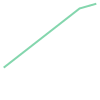

In [164]:
bikelane0

In [165]:
len(bikelane0) # bikelane0 is a MultiLineString, a list of lines

1

In [167]:
bikelane0[0].xy

(array('d', [-73.70507322331356, -73.70512206055538, -73.70534364804561]),
 array('d', [45.511033604253775, 45.51101969231954, 45.510846873492184]))

In [169]:
bikelane0[0].xy[0]

array('d', [-73.70507322331356, -73.70512206055538, -73.70534364804561])

In [170]:
mean_length = bp.LONGUEUR.mean()
print(mean_length)

133.49512324880297


In [171]:
sum_length = bp.LONGUEUR.max()
print(sum_length)

2446.0


In [172]:
len(bp['geometry'])

5639

In [173]:
count = 0
print("These are multilines roads")
for k in range(len(bp['geometry'])):
    if (len(bp['geometry'][k])>1):
        print(k)
    count+=len(bp['geometry'][k])
print("Overal number of different lines :", count)

These are multilines roads
204
466
602
658
859
862
887
923
929
938
Overal number of different lines : 5657


In [174]:
count = 0
for k in range(len(bp['geometry'])):
    count+=len(bp['geometry'][k][0].xy[0])
print("Overal number of points :", count)

Overal number of points : 25849


In [175]:
data_pointsx = np.array([])
data_pointsy = np.array([])
for k in range(len(bp['geometry'])):
    data_pointsx = np.append(data_pointsx, bp['geometry'][k][0].xy[1])
    data_pointsy = np.append(data_pointsy, bp['geometry'][k][0].xy[0])
data_points = np.vstack((data_pointsx, data_pointsy)).T # np.array([data_pointsx.tolist(), data_pointsy.tolist()]).T

In [176]:
data_points[0]

array([ 45.53258928, -73.59024204])

In [3]:
geo_json_data = json.load(open("./BikePaths/reseau_cyclable_2018_c.geojson"))

In [97]:
m_bike = folium.Map([45.53,-73.666], tiles='cartodbpositron', zoom_start=11)
HeatMap(data_points).add_to(m_bike)
m_bike

In [35]:
geo_json_data['features'].head()

AttributeError: 'list' object has no attribute 'head'

In [51]:
print(geo_json_data['features'][0]['properties']['LONGUEUR'])

for k in reversed(range(len(geo_json_data['features']))):
    if geo_json_data['features'][k]['properties']['LONGUEUR'] <= mean_length:
        geo_json_data['features'].remove(geo_json_data['features'][k])


90.0


In [52]:
#geo_json_data['features'] = geo_json_data['features']#[0:5]

In [5]:
m_bike = folium.Map([45.53,-73.666], tiles='cartodbpositron', zoom_start=11)
folium.GeoJson(geo_json_data).add_to(m_bike)
m_bike